# Setting up Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

cols = [0, 1, 2, 3, 4, 9, 13, 14, 15, 16, 17, 25, 27]
heads = ['ID', '$M_1$', '$M_2$', '$S_1$', '$S_2$', '$t_{pair}$', '$t_{elapsed}$', '$v_{kick}$',
         '$M_{rem}$', '$S_{rem}$', '$v_{escape}$', '$M_{tot}$', 'Gen']



def extractor(data_path: str, cluster: str):
    '''
    Returns dataframe containing metallicity in the last column, to be runned for each cluster.
    data_path should include the final "/" e.g.: data/. Also we're using Dyn.
    '''
    metal = []
    if cluster == 'gc': new_path = data_path + 'GC_chi01_output_noclusterevolv/Dyn/'
    if cluster == 'nsc': new_path = data_path + 'NSC_chi01_output_noclusterevolv/Dyn/'
    if cluster == 'ysc': new_path = data_path + 'YSC_chi01_output_noclusterevolv/Dyn/'
    for i, z in enumerate(os.listdir(new_path)):
        name = new_path + str(z) + '/nth_generation.txt'
        metal.append(pd.read_csv(name, delimiter=' ', skiprows=1, usecols=cols, names=heads))
        metal[i]['Z'] = float(z)
    whole = pd.concat(metal)
    return whole


whole_gc = extractor('data/','gc')
whole_nsc = extractor('data/','nsc')
whole_ysc = extractor('data/','ysc')
whole_gc = whole_gc[whole_gc['$t_{elapsed}$'] < 1.36e4]
whole_nsc = whole_nsc[whole_nsc['$t_{elapsed}$'] < 1.36e4]
whole_ysc = whole_ysc[whole_ysc['$t_{elapsed}$'] < 1.36e4]
display(whole_ysc)

,ID,$M_1$,$M_2$,$S_1$,$S_2$,$t_{pair}$,$t_{elapsed}$,$v_{kick}$,$M_{rem}$,$S_{rem}$,$v_{escape}$,$M_{tot}$,Gen,Z
0,70,76.697254,66.639358,0.725403,0.163330,11.967619,34.297146,685.446649,133.884923,0.828087,22.646987,114772.107176,2,0.0120
1,6196,69.292415,63.511349,0.711974,0.100949,5.117888,214.598746,301.000496,124.330663,0.813922,15.073360,38737.472733,2,0.0120
2,7967,56.687471,54.558071,0.743557,0.239766,21.934368,958.174950,143.781568,103.745950,0.831979,28.420132,187785.696955,2,0.0120
3,9701,64.265002,63.641092,0.734500,0.208438,11.856484,291.525094,376.254559,119.458912,0.824124,30.558254,163900.835799,2,0.0120
4,25143,80.895422,65.006386,0.747839,0.080874,28.770708,2465.798375,0.000000,136.380622,0.829230,22.090060,176059.087065,2,0.0120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,995058,43.617976,32.050526,0.723826,0.116248,19.072841,950.255566,1118.176533,70.736795,0.834799,24.361466,121901.952030,2,0.0016
822,996485,82.780381,75.213846,0.735345,0.064974,3.415324,528.316839,644.800273,147.925877,0.813897,19.368004,50377.302724,2,0.0016
823,999272,55.520562,40.781084,0.737356,0.104371,8.250016,8208.251481,0.000000,90.001343,0.836374,18.160684,58220.996567,2,0.0016
824,999278,85.256541,77.200252,0.734386,0.055030,2.130913,11.861612,1004.661098,152.136897,0.812870,21.085840,45873.418106,2,0.0016


# Grafici

## Masses

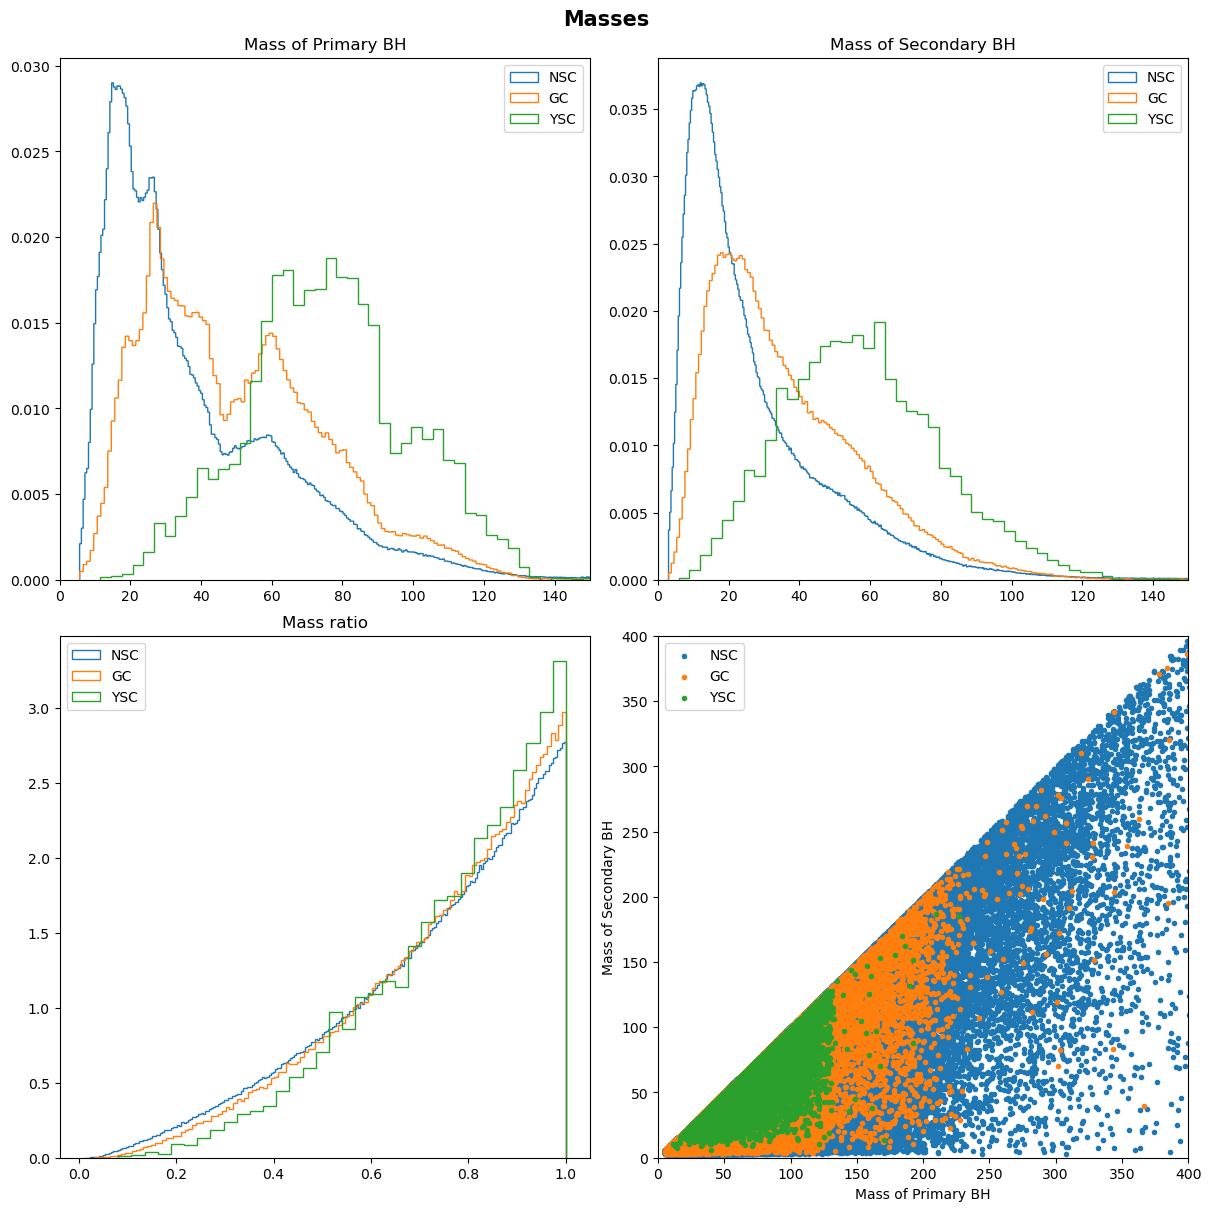

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')
fig.suptitle('Masses', fontsize=15, weight='bold')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():  # Yes, I do like dictionairies
    ax[0,0].hist(data['$M_1$'], 'auto', histtype='step', label=typo, density=True)
    ax[0,1].hist(data['$M_2$'], 'auto', histtype='step', label=typo, density=True)
    ax[1,0].hist(data['$M_2$'] / data['$M_1$'], 'auto', histtype='step', label=typo, density=True)
    ax[1,1].scatter(data['$M_1$'], data['$M_2$'], marker='.', label=typo)  # Of course the limit will be a y=x line,
# since y can't exceed x

ax[0,0].set_title('Mass of Primary BH')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlim(0,150)  # There are way larger values, but they aren't visible

ax[0,1].set_title('Mass of Secondary BH')
ax[0,1].set_xlim(0,150)
ax[0,1].legend(loc='upper right')

ax[1,0].set_title('Mass ratio')
ax[1,0].legend(loc='upper left')

ax[1,1].set_title('')
ax[1,1].legend(loc='upper left')
ax[1,1].set_xlabel('Mass of Primary BH')
ax[1,1].set_ylabel('Mass of Secondary BH')
ax[1,1].set_xlim(0,400)  # To show the Clusters with less BHs
ax[1,1].set_ylim(0,400)
plt.show()


# Spin

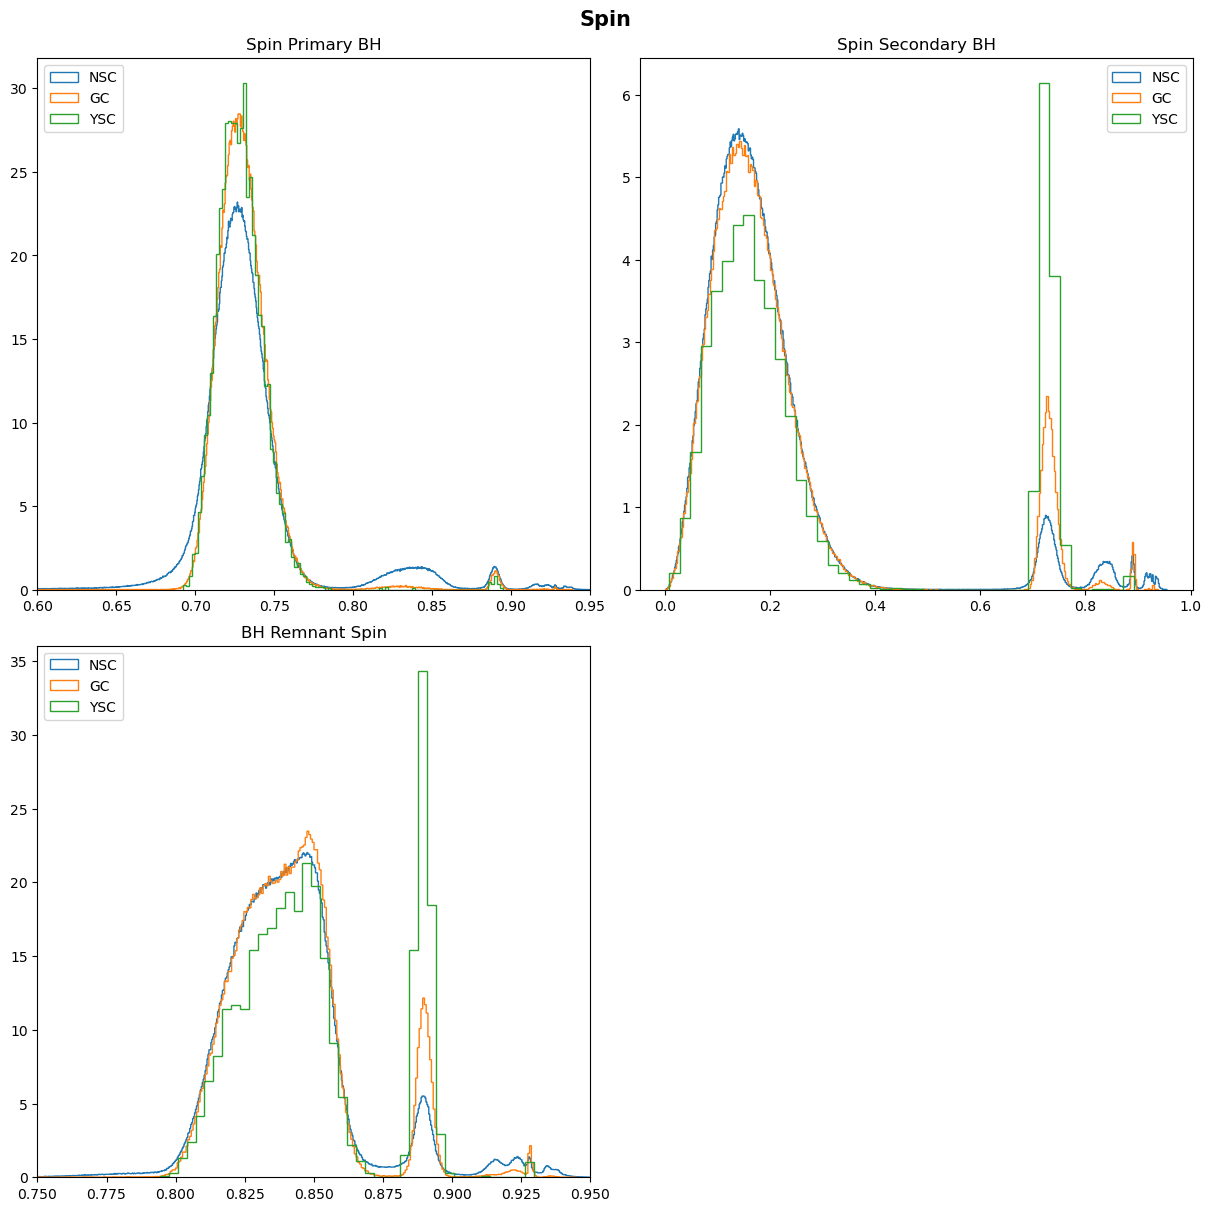

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')
fig.suptitle('Spin', fontsize=15, weight='bold')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():
    ax[0,0].hist(data['$S_1$'], 'auto', histtype='step', label=typo, density=True)
    ax[0,1].hist(data['$S_2$'], 'auto', histtype='step', label=typo, density=True)
    ax[1,0].hist(data['$S_{rem}$'], 'auto', histtype='step', label=typo, density=True)
    
ax[0,0].set_title('Spin Primary BH')
ax[0,0].legend(loc='upper left')
ax[0,0].set_xlim(.6, .95)

ax[0,1].set_title('Spin Secondary BH')
ax[0,1].legend(loc='upper right')

ax[1,0].set_title('BH Remnant Spin')
ax[1,0].legend(loc='upper left')
ax[1,0].set_xlim(.75, .95)

ax[1,1].set_axis_off()
plt.show()

# The Other Stuff

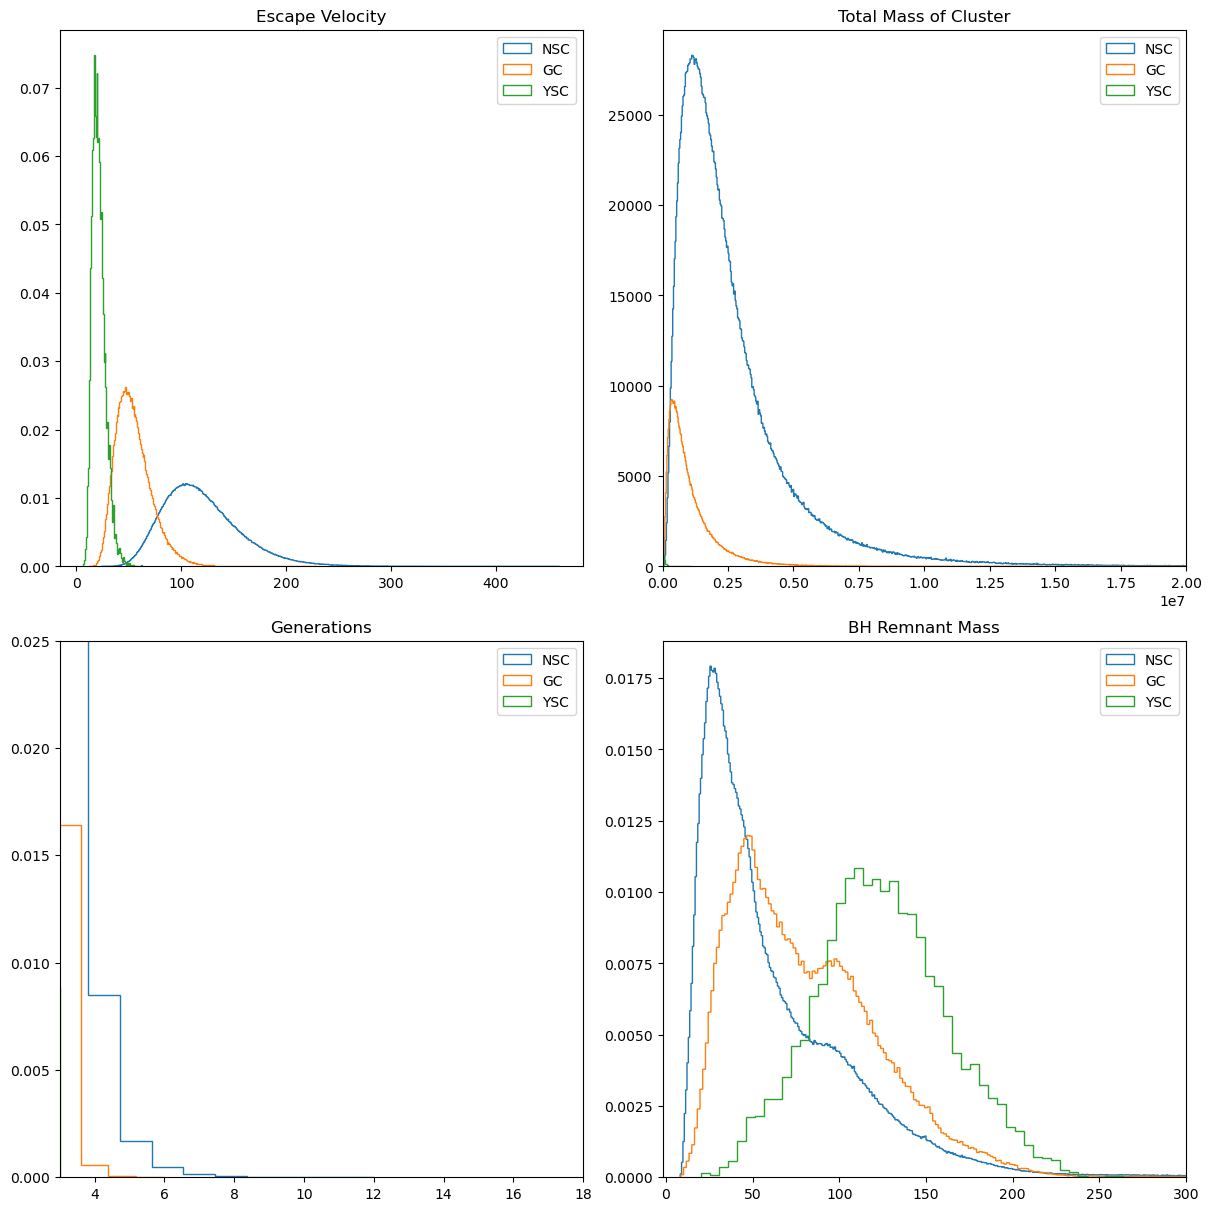

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():
    ax[0,0].hist(data['$v_{escape}$'], 'auto', histtype='step', label=typo, density=True)
    ax[0,1].hist(data['$M_{tot}$'], 'auto', histtype='step', label=typo) 
    ax[1,0].hist(data['Gen'], data['Gen'].nunique(), histtype='step', label=typo, density=True)
    ax[1,1].hist(data['$M_{rem}$'], 'auto', histtype='step', label=typo, density=True)

ax[0,0].set_title('Escape Velocity')
ax[0,0].legend(loc='upper right')

ax[0,1].set_title('Total Mass of Cluster')
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlim(-1, 2e7)

ax[1,0].set_title('Generations')
ax[1,0].legend(loc='upper right')
ax[1,0].set_ylim(0, .025)
ax[1,0].set_xlim(3, 18)

ax[1,1].set_title('BH Remnant Mass')
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlim(-2, 300)
plt.show()